# Instacart Market Basket Analysis 

## EDA

#### Introduction
- Instacart Market Basket Analysis . A kaggle competition held in 2017 held by Instacart , an American grocery delivery service .
- Users use an app or associated website to view products from various grocery stores and make a collective purchase .

#### Business Problem
- The Instacart market basket analysis challenge is to predict a customer's next
order . 
- Given the history of purchase of a customer ,recommending them a Product that
they can potentially buy saves time for the customer improving quality of service in turn improving business of the organization.

#### ML formulation
- Given xi (Order ID, User ID, Order number, Date and week of order and days since
last order) we need to predict yi (Reordered or not) .
- This is a classification problem as we need to determine if a product is purchased or not i.e. 'Reordered'


#### Performance Metric
- The performance metric as specified is F1 score . 
- Since this is a classification problem F1 score can be found by finding out the precision and recall
- F1 =2* (precision x recall)/(precision + recall)


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt   # Importing necessary libraries 
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from matplotlib import pyplot
import re
from wordcloud import WordCloud 

In [3]:
aisles = pd.read_csv(r"/content/drive/MyDrive/Instacart/aisles.csv")
depart = pd.read_csv(r"/content/drive/MyDrive/Instacart/departments.csv")
prior = pd.read_csv(r"/content/drive/MyDrive/Instacart/order_products__prior.csv")
train = pd.read_csv(r"/content/drive/MyDrive/Instacart/order_products__train.csv")  #importing the given datasets
orders = pd.read_csv(r"/content/drive/MyDrive/Instacart/orders.csv")
products = pd.read_csv(r"/content/drive/MyDrive/Instacart/products.csv")

#### NAN values

In [ ]:
aisles.isnull().values.any() 

False

In [ ]:
depart.isnull().values.any()

False

In [ ]:
prior.isnull().values.any()

False

In [ ]:
train.isnull().values.any()

False

In [ ]:
orders.isnull().values.any()

True

In [ ]:
products.isnull().values.any()

False

- Only the ***Orders*** dataset contains NAN values
- The rest of the datasets are clean
- We will explore the NAN values of ***Orders*** dataset later down the analysis 

#### Train data

In [ ]:
train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


- the ***Orders_product_train*** dataset is the main dataset which contains the dependent variable 
- Here 'reordered' is the y variable 
- Let's check the count of the y variables

In [ ]:
train['reordered'].value_counts()

1    828824
0    555793
Name: reordered, dtype: int64

In [ ]:
print(round(828824/len(train)*100,1),'%','is of positive class')
print('This data set is imbalanced ')

59.9 % is of positive class
This data set is imbalanced 


#### Merging datasets

- Information here is divided in to multiple datasets  
- Let's combine Train,Products and orders datasets

In [4]:
final_data= pd.merge(train, orders, how="inner", on="order_id") # merging train data with orders dataset
final_data=pd.merge(final_data, products, how="inner", on="product_id") # merging the new dataset with products datasets 

final_data=pd.merge(final_data, aisles, how="inner", on="aisle_id") # merging with aisles dataset 
final_data=pd.merge(final_data, depart, how="inner", on="department_id") # merging with department dataset 

In [5]:
del final_data['order_id']
del final_data['user_id']
del final_data['eval_set']       # removing the features that are not needed 
del final_data['department_id']
del final_data['aisle_id']
del final_data['product_id']

In [ ]:
final_data.head()

,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department
0,1,1,4,4,10,9.0,Bulgarian Yogurt,yogurt,dairy eggs
1,7,1,14,4,6,16.0,Bulgarian Yogurt,yogurt,dairy eggs
2,1,1,15,0,7,7.0,Bulgarian Yogurt,yogurt,dairy eggs
3,11,1,4,3,8,14.0,Bulgarian Yogurt,yogurt,dairy eggs
4,8,0,5,4,14,30.0,Bulgarian Yogurt,yogurt,dairy eggs


#### Popular Items

- The *Order products prior* dataset contains the order history for a particular product .
- The Train dataset contains the same information but with the most recent data
- Lets use the combined train dataset to find patterns
- It says if a product was reordered or not at different times 
- We can get a good idea of the items that were reordered form most to least

In [7]:
pri1 = final_data[final_data['reordered'] != 0] # considering only the points which are reoedered 

In [ ]:
count= pri1.groupby(['product_name']).count()  #grouping by the product id
fin_count=count.sort_values(by=['reordered'], ascending=False) #sorting the values 
fin_count.reset_index(inplace=True)   #index reset

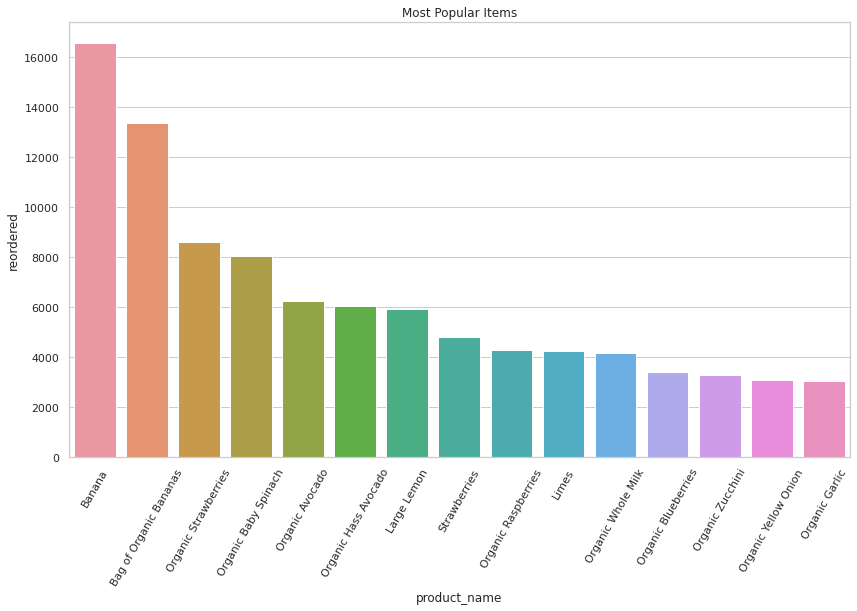

In [ ]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (14, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
ax = sns.barplot(ax=ax,x="product_name", y="reordered", data=fin_count.head(15)) #plotting 
plt.xticks(rotation=60) #changing the rotation of the names on the x-axis for better fit
plt.title('Most Popular Items');

- Plottig a bar graph between items vs total number of times that item was  reordered and considering the top 15
- From the plot its apparent that the most reordered items are bananas 
- Bananas and Organic Bananas occupy the top 2 spots with more than 16000 and 13000 times reordered respectively
- We can conclude that the Most popular items are are all organic fruits and vegetables which doesn't come as a surprise  
- So if an item is a vegetable or a fruit it has a very good chance of being reordered 

#### Popular department

In [ ]:
depart.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
len(depart)

21

- The department dataset contains the various names of the departments and theird ID
- There are 21 unique departments by which items are categorized and further divided in to different aisles
- Lets find the department that has good chance of being reordered .


In [ ]:
depart_count= pri1.groupby(['department']).count() #Grouping by department and getting count 
depart_count['reordered']= depart_count['reordered']/depart_count['reordered'].sum() #Finding the percentage 
depart_count=depart_count.sort_values(by=['reordered'], ascending=True) # sorting 
depart_count.reset_index(inplace=True) #index reset

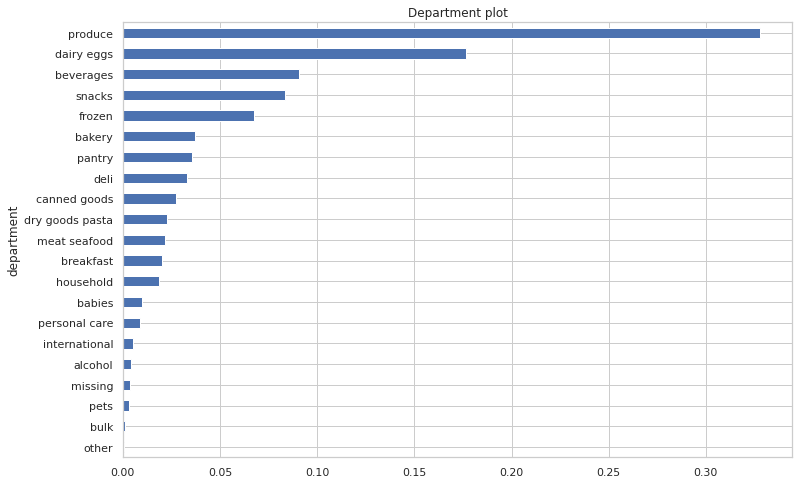

In [ ]:
dp = depart_count.set_index('department')['reordered'] 
ax = dp.plot(kind='barh',figsize=(12, 8),title='Department plot') # Bar horizontal plot
plt.plot();

- Plotting a bar graph between departent and it's percentage of times each department was reordered 
- Looking at the department , It is clear that *produce* is overwhelmingly popular with more than 30% of the total, followed by *dairy eggs* with around 18%
- This also coincides with our previous observation with organic items being most reordered 
- We can confirm that organic goods have a strong chance of being picked up 
- Having Organic fruits and Vegetables always in stock is a good idea 
- We can conclude that if an item is picked by an user , that item belonging to produce or dairy department is likely

#### Most reordered products in top 3 department 

- Since we saw that the top 3 most reordered products are in department Produce , dairy eggs and Beverages
- Lets now further find the most reordered products in these departments 

In [ ]:
dep1 = pri1[pri1['department']=='produce'] # considering only produce 
dep2 = pri1[pri1['department']=='dairy eggs'] # considering only dairy eggs 
dep3 = pri1[pri1['department']=='beverages'] #considering only dairy beverages 

In [ ]:
def org(x):
    y=[]
    for i in x:
        c=i.lower()  #converting to lower
        c=c.strip()  # removing leading and trailing spaces 
        c=re.sub('[^A-Za-z0-9]+', ' ', c)  #removing special characters
        re.sub(' +', ' ', c) # removing extra spaces 
        c=re.sub(' ', '_', c) # converting spaces to underscore 
        y.append(c)
    return y

In [ ]:
pro=org(dep1['product_name'].values)
dai=org(dep2['product_name'].values)
bev=org(dep3['product_name'].values)

##### Top reordered products in produce

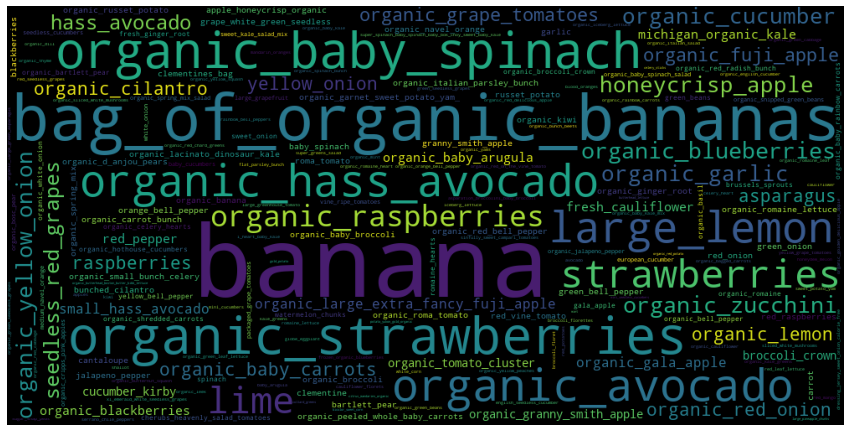

In [ ]:
a=(" ").join(pro) # converting to sting 
cloud = WordCloud(width = 1000, height = 500,collocations=False).generate(a) # Initiating word cloud 
plt.figure(figsize=(15,8))  # dimensions of the word cloud 
plt.imshow(cloud)
plt.axis("off")
plt.show();

- building a word clouds for products in the top 3 reordered departments , we get a good idea on what products are most reordered for the departments we have chosen
- In the Organic department , Bananas are most reordered , followed by spinach and strawberries 


##### Top products in Dairy eggs

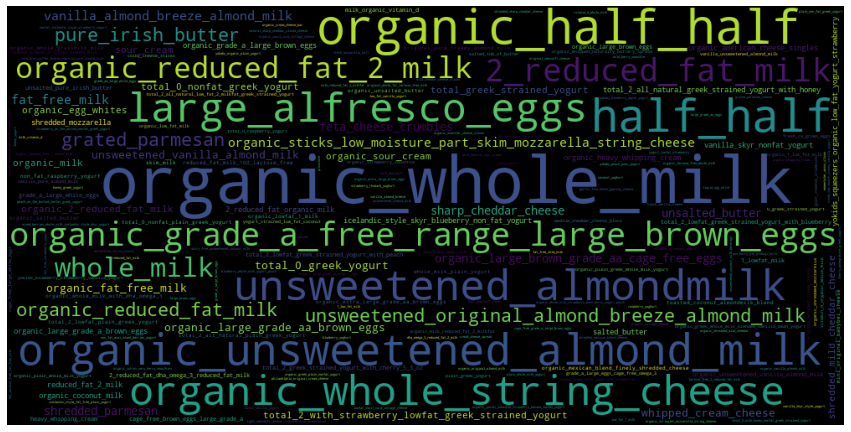

In [ ]:
a=(" ").join(dai)
cloud = WordCloud(width = 1000, height = 500,collocations=False).generate(a)
plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis("off")
plt.show();

##### Top products in Beverages

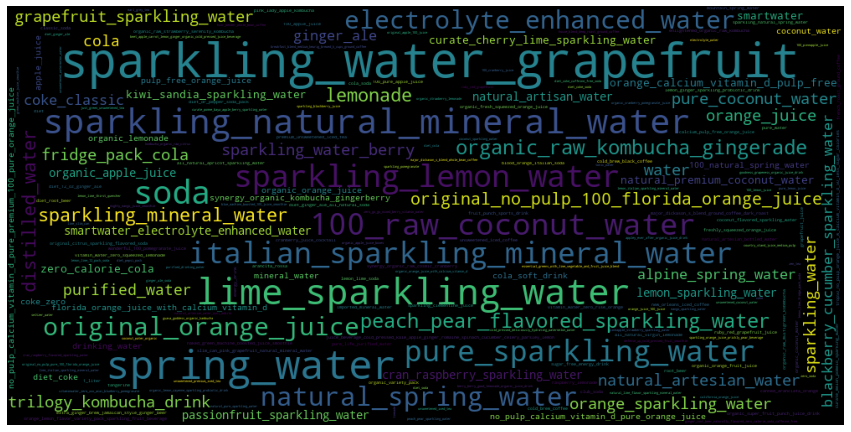

In [ ]:
a=(" ").join(bev)
cloud = WordCloud(width = 1000, height = 500,collocations=False).generate(a)
plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis("off")
plt.show();

- In the Dairy eggs department, organic whole milk , unsweetened almondmilk,large alfresco eggseggs seem to be most reordered 
- In the Beverages department , the sparkling water grapefruit and lime sparkling water is the most reordered item
- Hence, these products have a greater chance of being reordered given their respective departments 

#### Popular aisles

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
 len(aisles)

134

- The aisles contains the name and id of the various aisles in the dataset
- There are 134 unique isles each representing different category of items

In [ ]:
aisle_merge= aisle_merge.groupby(['aisle']).count() #grouping 
aisle_merge=aisle_merge.sort_values(by=['reordered'], ascending=False) #sorting 
aisle_merge.reset_index(inplace=True) #index reset
a1=aisle_merge.head(20) #taking top 20

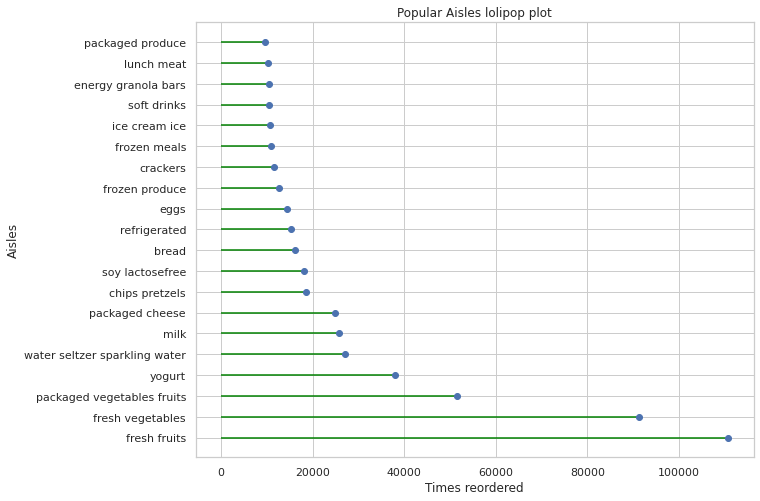

In [ ]:
# https://python-graph-gallery.com/182-vertical-lollipop-plot/
figure(figsize=(10, 8)) # setting plot size
r=range(1,len(a1.index)+1) # Setting the max length
plt.hlines(y=r, xmin=0, xmax=a1['reordered'], color='green')  # using hlines function to plot a lollopop plot        
plt.plot(a1['reordered'], r, "o")                  
plt.yticks(r, a1['aisle']) # setting range and names for y axis
plt.title("Popular Aisles lolipop plot") # Title name
plt.xlabel('Times reordered')  # axis names 
plt.ylabel('Aisles')
plt.show();

- Plotting a lollipop plot for top 20 aisles gives a good picture of the most popular ones
- Fresh fruits being most reordered , an observation which we have seen before as the most popular item being the Banana and department being Produce 
- The second and third most reordered are fresh vegetables and packed vegetable fruits 
- Hence , from the previous observations and the current one , we can firmly conclude that an item will be reordered the most if that item is either a fruit or a vegetable 
- Now to find the aisles that are not popular

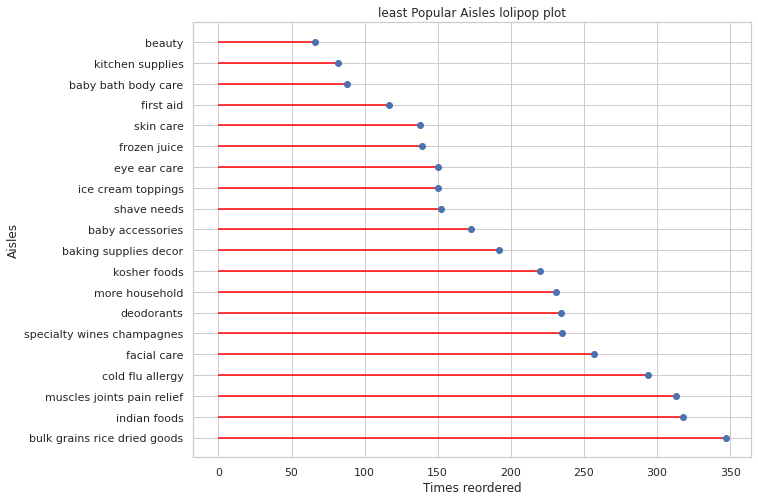

In [ ]:
a2=aisle_merge.tail(20) # taking bottom 20
figure(figsize=(10, 8)) # setting plot size
r=range(1,len(a2.index)+1) # Setting the max length
plt.hlines(y=r, xmin=0, xmax=a2['reordered'], color='red')  # using hlines function to plot a lollopop plot        
plt.plot(a2['reordered'], r, "o")                  
plt.yticks(r, a2['aisle']) # setting range and names for y
plt.title("least Popular Aisles lolipop plot") # Title name
plt.xlabel('Times reordered')  # axis names 
plt.ylabel('Aisles')
plt.show();

- Plotting a lollipop plot between aisles and times each aisle was reordered
- The least popular aisle belongs to beauty products 
- But looking closely there are similarities between these ailses 
- most of them belong to kitchen supplies or body care or medical products .
- we can conclude here that items belonging these aisles have the least chance of being reordered 

#### Most reordered aisles in Top department 

- Now that we found the most and least popular aisles where product were reordered , lets find the aisles in the top 3 departments that we established before 
- Plotting for all the ailses by popularity(reordered) from the top 3 Department 

In [ ]:
ais=pri1.loc[pri1['department'].isin(['produce','dairy eggs','beverages'])] # considering only top 3 departments
ail_merge=ais.groupby(['department','aisle'])['reordered'].aggregate("count").reset_index()

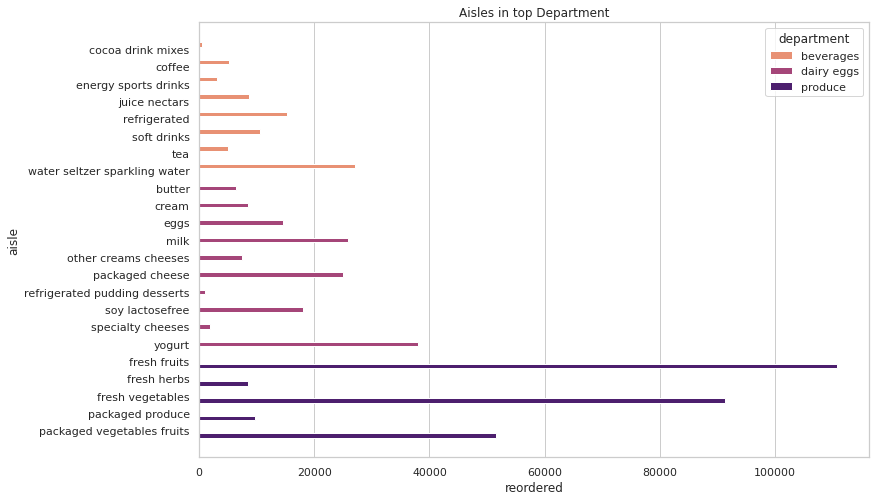

In [ ]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (12, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
sns.barplot(ax=ax,x = 'reordered',y = 'aisle',hue = 'department',data =ail_merge ,palette = "magma_r")
plt.title('Aisles in top Department')
plt.plot();

- Plotting a bar graph for all the aisles in the top 3 department
- We already observerd  that fresh fruits is the most reordered aisle , which comes under the produce department 
- The least reordered aisle in the produce department is fresh herbs and packed produce .
- Coming to the Dairy eggs department , Yogurt ailse is the most reordered .
- The least reordered seems to be refrigerated pudding deserts
- Finally in the Beverages department , items from water seltzer sparkling water are most reprdered and cocoa drink mixes are least reordered 
- We can notice a clear  trend here that Fresh items are the most reordered in every aisle and department 

In [ ]:
ail_merge=dep1.groupby(['aisle']).count().reset_index()

#### User Buying patterns


- The orders dataset contains the time and day in which users made their purchase 
- This dataset also contains the number of days since a user's last order 
- We found out at the beginning that this dataset contains NAN values 
- Lets explore this further 

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders.isnull().any() #checking for nan values

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

In [ ]:
orders['days_since_prior_order'].isnull().values.sum() #sum of nan values

206209

- Out of the 7 features in ***Orders*** dataset only *days_since_prior_order* has about 200 thousand nan values 
- Thats a lot of NAN values. Checking if that contains a pattern is a good idea

In [ ]:
order_nan = orders[orders['days_since_prior_order'].isnull()] #considering the points which are only nan

In [ ]:
order_nan.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


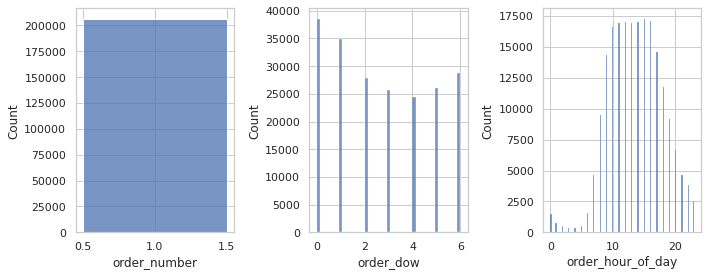

In [ ]:
fig, ax =plt.subplots(1,3,figsize=(10,4))  # setting the subplots dimensions and order 
sns.histplot(data=order_nan,x="order_number", ax=ax[0]) #plotting hiostogram
sns.histplot(data=order_nan,x='order_dow', ax=ax[1])
sns.histplot(data=order_nan,x='order_hour_of_day', ax=ax[2])
fig.show()
plt.tight_layout()  #adjusting the subplots layouts so they dont merge 

- Upon plotting a Histogram for the important features the *order number* feature stands out
- The *order number* feature tells how many times a user made an order before
- The histogram shows the NAN values are for all the users who made only one order
- This means that they had no previous orders as it was their first ever order
- So, Filling the NAN values with the value 0 makes sense as they have 0 previous orders

In [ ]:
pri1['days_since_prior_order'] = pri1['days_since_prior_order'].fillna(0) #Filling nan values with 0

In [ ]:
pri1.isnull().any() #Checking to see if any nan are left

add_to_cart_order         False
reordered                 False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order    False
product_name              False
aisle                     False
department                False
dtype: bool

#### Days before users reorder 

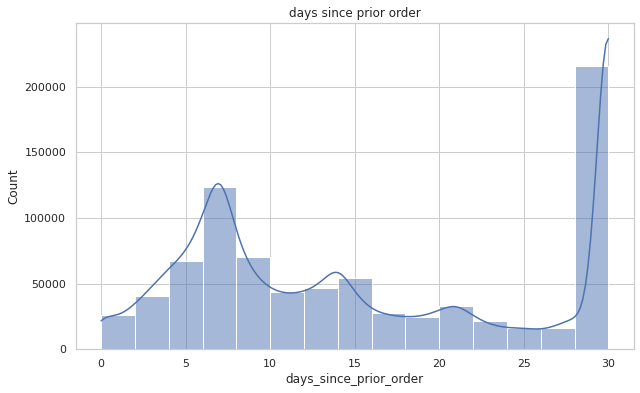

In [ ]:
sns.set_theme(style="whitegrid") #Setting background style
a4_dims = (10, 6) #initiating dimensions 
fig, ax = pyplot.subplots(figsize=a4_dims) #setting the dimensions
sns.histplot(ax=ax,data=pri1, x="days_since_prior_order", binwidth=2,kde=True) # plotting histogram with kde which gives a wave (a smoothed-out version)
plt.title('days since prior order');

- After plotting a Histogram of days *since proir order* it is clear that many users take at-least 30 days to reorder
- There are users that make a purchase within a week 
- Let's seperate this by department .

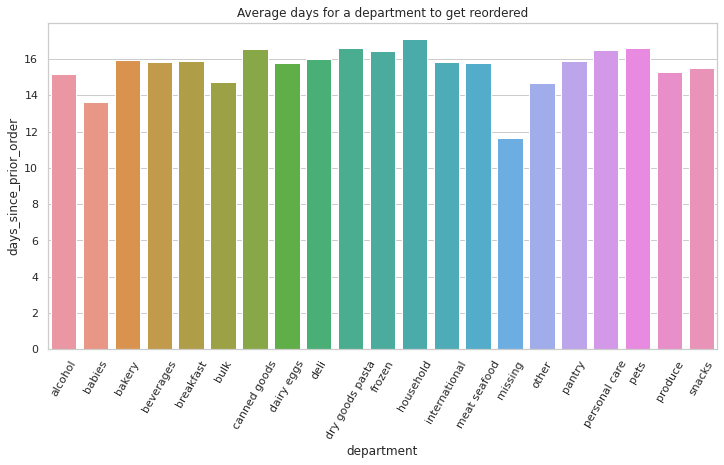

In [ ]:
c1 = pri1.groupby(['department'])['days_since_prior_order'].mean().reset_index()
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (12,6) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
ax = sns.barplot(ax=ax,x="department", y="days_since_prior_order", data=c1) #plotting 
plt.xticks(rotation=60) #changing the rotation of the names on the x-axis for better fit
plt.title('Average days for a department to get reordered');

- Plotting a bar plot for average days taken to reorder any particular item from a department .
- The plot is mostly even , which means no item is consistently re-ordered early or late .
- The ***Missing*** department shows a lesser value , which might be because that department is reordered less as we saw at the beginning .

#### Time of day and Date of week

In [9]:
mor=[6,7,8,9,10,11];aft=[12,13,14,15,16];eve=[17,18,19,20];ni=[21,22,23,0];mid=[1,2,3,4,5]  #making bins according to the time

name=[]
for i in pri1['order_hour_of_day']:
    if i in mor:
        name.append('Morning')
    if i in aft:
        name.append('Afternoon')       # assigning the name for the particular time frame
    if i in eve:
        name.append('Evening')
    if i in ni:
        name.append('Night')
    if i in mid:
        name.append('Midnight')

pri1['time']=name  #creating a column with name 

In [10]:
week=[]
for j in pri1['order_dow'].values:
    if j==0:
        week.append('Sunday')
    if j==1:
        week.append('Monday')
    if j==2:
        week.append('Tuesday')  # Giving the name of the week for the numbers given in the dataset
    if j==3:
        week.append('Wednesday')
    if j==4:
        week.append('Thursday')
    if j==5:
        week.append('Friday')
    if j==6:
        week.append('Saturday')
pri1['week']=week          #creating a column for the name 

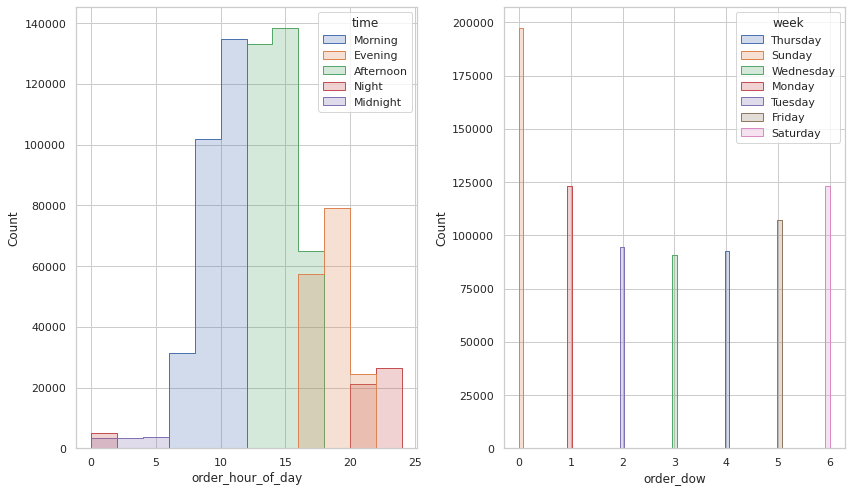

In [ ]:
fig, ax =plt.subplots(1,2,figsize=(12,7)) #subplot size and order
sns.histplot(data=pri1,x="order_hour_of_day",hue='time' ,element='step',binwidth=2,ax=ax[0]) #plotting 
sns.histplot(data=pri1,x='order_dow',hue='week',element='step', ax=ax[1])
fig.show()
plt.tight_layout() # to not merge the plots

- Plotting histograms for time of day and day of week gives us some good insights on buying patterns
- Coming to the time of day , most people make their orders between mid morning and late afternoon, some in the evening and very few at midnight 
- Looking at the day of week ,sunday seems to be the day most people re-order, which is normal and the rest of the days are mostly evenly spaced ,more orders are on sunday 
- These results don't really come as a surprise as it is the general buying pattern and no abnormality is seen
- Let's combine both and get a clearer picture 

In [ ]:
a = pri1.groupby(['time','week'])['reordered'].aggregate("count").reset_index() #group by
a = a.pivot('time', 'week', 'reordered') #data reshape to better fit for a heatmap

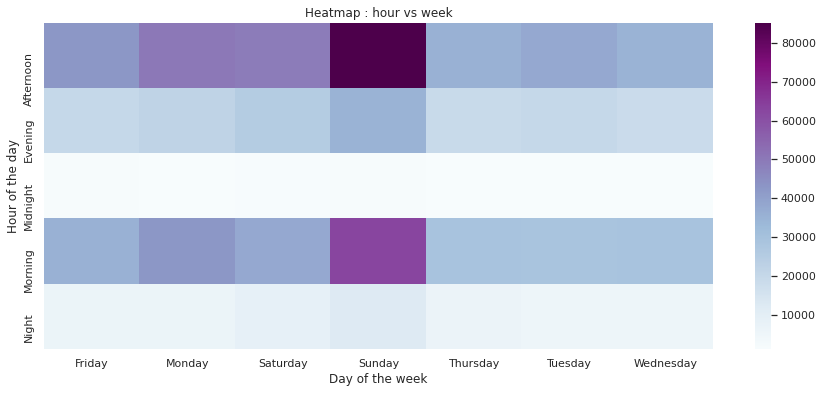

In [ ]:
plt.figure(figsize=(15, 6)) # plot size
sns.heatmap(a, cmap='BuPu') # plotting the heatmap
plt.ylabel('Hour of the day') 
plt.xlabel('Day of the week')
plt.title('Heatmap : hour vs week');

- By plotting a heat map of time of day and day of the week we get a clearer picture of the exact time and day users make their order
- At any given week mornings and afternoons are the time orders usually occur 
- But it does peak on sunday afternoons .
- so, If a user is to order or re-order an item we can say that they usually do so during afternoons and on Sunday
- We can take this further and try to find what types of products are ordered on what day

In [ ]:
new_dep=pri1[['reordered','week','department']]
c1 = new_dep.groupby(['department', 'week'])['reordered'].aggregate("count").reset_index()
c1 = c1.pivot('department', 'week', 'reordered')

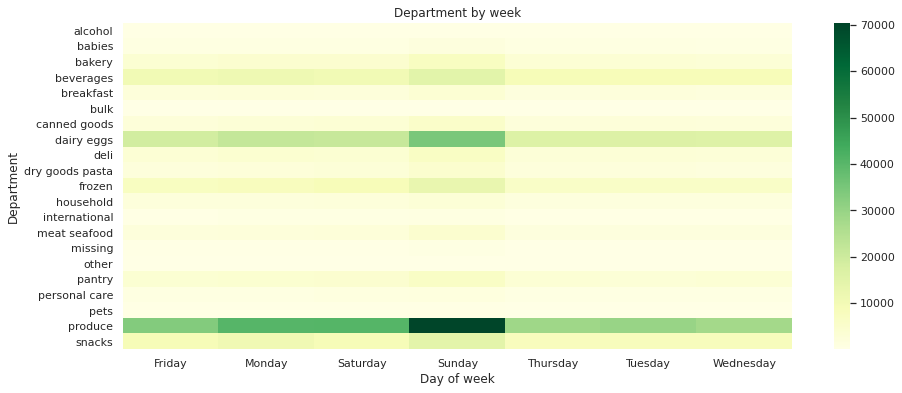

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(c1, cmap='YlGn')
plt.xlabel('Day of week')
plt.ylabel('Department')
plt.title('Department by week');

- plotting a heatmap of day of week and departments ,We find the same patters as before 
- More orders occur on sunday and those orders belong to produce 
- A few more observations include produce being consistently ordered thoughout the week 
- dairy eggs and snacks being just behind 
- Hence , at any given day of the week , an item belonging to Produce department has the highest chance of being reordered closely followed by dairy eggs and snacks

##### Most reordered items per day

In [ ]:
b = pri1.groupby(['week','product_name'])['reordered'].aggregate("count").reset_index()  # grouping product names by week
b1=b[b['week'] == 'Sunday']  
b2=b[b['week'] == 'Monday']
b3=b[b['week'] == 'Tuesday']
b4=b[b['week'] == 'Wednesday']   # Dividing the dataset by week
b5=b[b['week'] == 'Thursday']
b6=b[b['week'] == 'Friday']
b7=b[b['week'] == 'Saturday']

b11=b1.sort_values(by=['reordered'], ascending=False) 
b12=b2.sort_values(by=['reordered'], ascending=False)
b13=b3.sort_values(by=['reordered'], ascending=False)
b14=b4.sort_values(by=['reordered'], ascending=False)    # sorting by reorder 
b15=b5.sort_values(by=['reordered'], ascending=False)
b16=b6.sort_values(by=['reordered'], ascending=False)
b17=b7.sort_values(by=['reordered'], ascending=False)

b21=b11.head(5)
b22=b12.head(5)  # considering only top 5
b23=b13.head(5)
b24=b14.head(5)
b25=b15.head(5)
b26=b16.head(5)
b27=b17.head(5)

bfinal=pd.concat([b21,b22,b23,b24,b25,b26,b27]).reset_index() # stacking the dataframes vertically

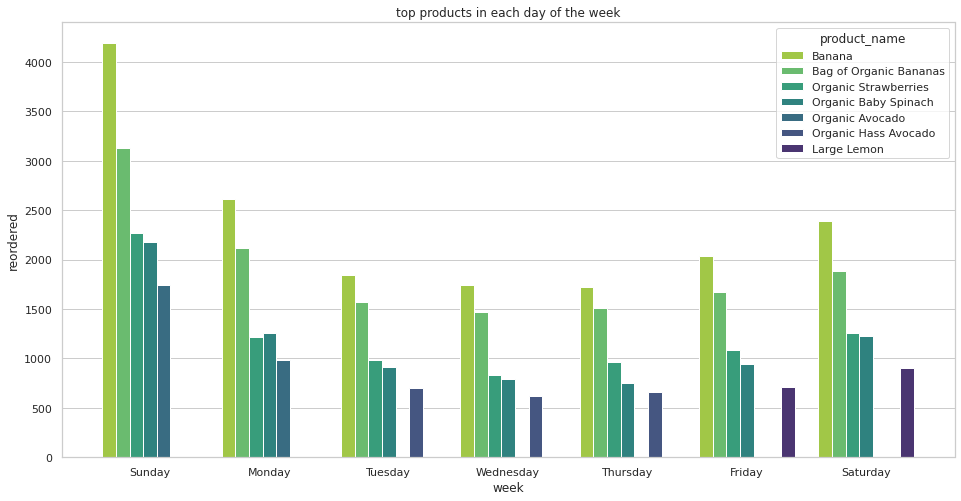

In [ ]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (16, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
sns.barplot(ax=ax,x = 'week',y = 'reordered',hue = 'product_name',data =bfinal ,palette = "viridis_r")
plt.title('top products in each day of the week')
plt.plot();

- After gettin the top 5 re-ordered products by day of week, we only get 7 products in total .
- The Banana ,Bag or organic bananas,Organic Strawberries and Organic Baby spinach are consistently ordered throughout the week while the other 3 are alternating 
- As we have seen before, sunday is the day where most reorders are made and Banana tops the list as the most reorderd item each day, an observation which we have already seen at the beginning 
- Hence, Bananas and Bag of Bananas should always be in stock


##### Most reordered items per time of day

In [ ]:
c = pri1.groupby(['time','product_name'])['reordered'].aggregate("count").reset_index()  # grouping product names by week
c1=c[c['time'] == 'Morning']  
c2=c[c['time'] == 'Afternoon']
c3=c[c['time'] == 'Evening']
c4=c[c['time'] == 'Night']   # Dividing the dataset by time
c5=c[c['time'] == 'Midnight']

c11=c1.sort_values(by=['reordered'], ascending=False) 
c12=c2.sort_values(by=['reordered'], ascending=False)
c13=c3.sort_values(by=['reordered'], ascending=False)
c14=c4.sort_values(by=['reordered'], ascending=False)    # sorting by reorder 
c15=c5.sort_values(by=['reordered'], ascending=False)

c21=c11.head(5)
c22=c12.head(5)  # considering only top 5
c23=c13.head(5)
c24=c14.head(5)
c25=c15.head(5)

bfinal=pd.concat([c21,c22,c23,c24,c25]).reset_index() # stacking the dataframes vertically

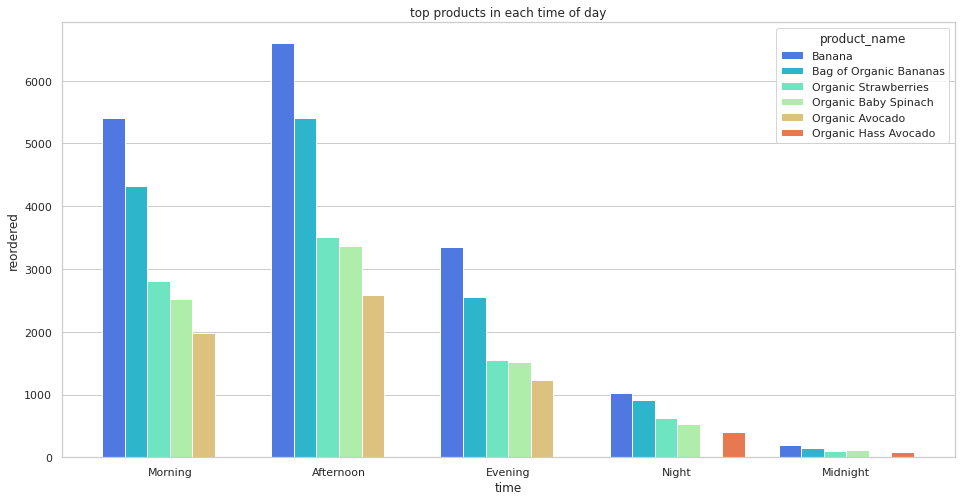

In [ ]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (16, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
sns.barplot(ax=ax,x = 'time',y = 'reordered',hue = 'product_name',data =bfinal ,palette = "rainbow")
plt.title('top products in each time of day')
plt.plot();

- Getting top 5 reordered products by time of day
- We see a similar trend here as only 6 products are at top for each time of day
- Most reorders are during afternoon and as usual the most reordered product is the Banana.
- The Banana , Bag of Organic Bananas , Organic strawberries and Organic Baby spinach are consistently reordered during all times of day but the number of reorders are usually less at night and midnight  

#### Order in which items are added to cart

- The ***add to car order*** feature gives the order in which a user added items to the cart during a single order 
- Though this feature might not say if an item added to the cart first has a high chance of it being reordered again , it is still a good idea to find any other patterns that it might exhibit 


In [ ]:
pri1['add_to_cart_order'].value_counts() #finding the unique values in the feature 

1     94817
2     86916
3     78150
4     70492
5     62744
      ...  
77        2
75        2
78        1
79        1
80        1
Name: add_to_cart_order, Length: 80, dtype: int64

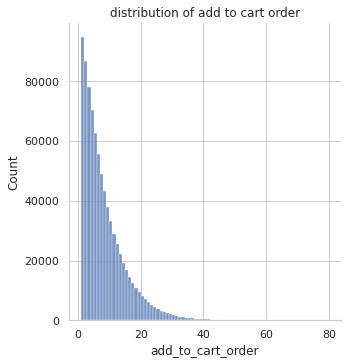

In [ ]:
sns.set_theme(style="whitegrid")
sns.displot(pri1, x="add_to_cart_order",binwidth=1) #Histogram for add to cart order 
plt.title('distribution of add to cart order');

- From the above , we can see that maximum items a single cart had is 80
- Most of the items were added to the cart at the beginning 

In [ ]:
re1 = pri1[pri1['add_to_cart_order'] == 1] 
re2 = pri1[pri1['add_to_cart_order'] == 2] 
re3 = pri1[pri1['add_to_cart_order'] == 3]  # considering only the items that are added to cart from 1 to 5
re4 = pri1[pri1['add_to_cart_order'] == 4] 
re5 = pri1[pri1['add_to_cart_order'] == 5] 

r1 = re1.groupby(['product_name','add_to_cart_order'])['reordered'].aggregate("count").reset_index()
r2 = re2.groupby(['product_name','add_to_cart_order'])['reordered'].aggregate("count").reset_index() # grouping by the product name , add to cart order and counting the respective reorders 
r3 = re3.groupby(['product_name','add_to_cart_order'])['reordered'].aggregate("count").reset_index()
r4 = re4.groupby(['product_name','add_to_cart_order'])['reordered'].aggregate("count").reset_index()
r5 = re5.groupby(['product_name','add_to_cart_order'])['reordered'].aggregate("count").reset_index()

In [ ]:
r11=r1.sort_values(by=['reordered'], ascending=False) 
r12=r2.sort_values(by=['reordered'], ascending=False)
r13=r3.sort_values(by=['reordered'], ascending=False)
r14=r4.sort_values(by=['reordered'], ascending=False)    # sorting by reorder 
r15=r5.sort_values(by=['reordered'], ascending=False)

r21=r11.head(5)
r22=r12.head(5)  # considering only top 5
r23=r13.head(5)
r24=r14.head(5)
r25=r15.head(5)

bfinal=pd.concat([r21,r22,r23,r24,r25]).reset_index() # stacking the dataframes vertically

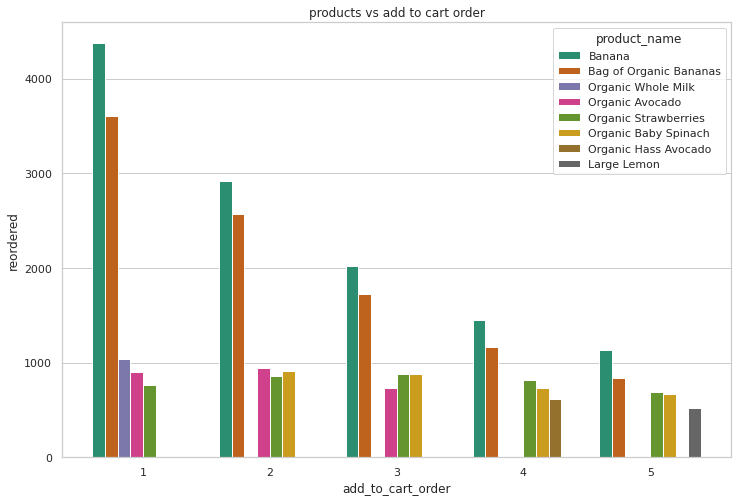

In [ ]:
sns.set_theme(style="whitegrid") #setting the background to whitegrid
a4_dims = (12, 8) #initializing dimensions of the plot
fig, ax = pyplot.subplots(figsize=a4_dims)  
sns.barplot(ax=ax,x = 'add_to_cart_order',y = 'reordered',hue = 'product_name',data =bfinal ,palette = "Dark2")
plt.title('products vs add to cart order')
plt.plot();

- Plotting a bar plot for most items that are added to cart from first to fifth .
- We see a similar trend as we have seen all along 
- Banana is the product that is added to the cart first when it's being reordered 
- We see a downward trend in the order in which banana is ordered .
- As the number of items that are added to the cart go up, the banana is not ordered as many times as the beginning 
- This is probably because the first item added to the cart is the Banana most times 

#### Summary

Upon analysing the datasets a few conclusions can be made:
- The most popular items purchased belong to produce i.e organic fruits and vegetables with the most re-ordered item being the Banana
- This also coincides with the observation that the top 3 popular aisles being fruits and vegetables
- Purchases are most active between morning and afternoon
- Most reordered are made on Sundays
- Items in produce are consistently ordered throughout the week 
- Apart from Fruits and vegetables Dairy eggs and snacks are also a popular choice 